# *합성곱 신경망*
 ## 5. CNN 구현하기

- 구현 할 CNN은 "Conv - ReLU - Pooling - Affine - ReLU - Affine - Softmax" 순으로 작성
![](image/fig 7-23.png)

- 구현에 앞서, 필요한 함수 호출

In [15]:
from data.layers import *
from data.util import *
from data.mnist import *
import collections

> **- 이하 초기화 코드 (하이퍼파라미터 설정, 매개변수 초기화, 계층 설정)**

In [27]:
class SimpleConvNet:
    def __init__(self, input_dim = (1, 28, 28),
                conv_params = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                hidden_size = 100, output_size = 10, weight_init_std = 0.01):
        filter_num = conv_params['filter_num']
        filter_size = conv_params['filter_size']
        filter_pad = conv_params['pad']
        filter_stride = conv_params['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

#### 딕셔너리에 하이퍼파라미터 값 저장
######################################################################################################################################


        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
    
#### 가중치 매개변수 초기화
#### 필요한 매개변수는 1번 conv, 2번 affine, 3번 affine의 가중치와 편향
######################################################################################################################################


        self.layers = collections.OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                          self.params['b1'],
                                          conv_params['stride'],
                                          conv_params['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h = 2, pool_w = 2, stride = 2)
        
        self.layers['Affine1'] = Affine(self.params['W2'],
                                       self.params['b2'])
        self.layers['Relu2'] = Relu()
        
        self.layers['Affine2'] = Affine(self.params['W3'],
                                       self.params['b3'])
        self.last_layer = SoftmaxWithLoss()

#### OrderedDict에 계층들을 차례대로 추가
######################################################################################################################################

> **- 이하 추론용 predict 메서드와 손실함수 값을 구하는 loss 메서드**

In [4]:
def predict(self, x):
    for layer in self.layers.value():
        x = layer.forward(x)
    return x


def loss(self, x, t):
    y = self.predict(x)
    return self.last_layer.forward(y, t)

- 인수 x는 입력데이터, t는 정답 레이블
- predict 메서드는 계층의 맨 앞에서부터 차례대로 forward 메서드를 호출
- loss 메서드는 predict 결과를 인수로 마지막 층 forward 메서드를 호출

> **- 이하 기울기 산출 구현**

In [5]:
def gradient(self, x, t):
    #### 순전파
    self.loss(x, t)
    
    #### 역전파
    dout = 1
    dout = self.last_layer.backward(dout)
    
    layers = list(self.layers.values())
    layerss.reverse()
    for layer in layers:
        dout = layer.backward(dout)
        
    
    #### 결과 저장
    grads = {}
    grads['W1'] = self.layers['Conv1'].dW
    grads['b1'] = self.layers['Conv1'].db
    grads['W2'] = self.layers['Affine1'].dW
    grads['b2'] = self.layers['Affine1'].db
    grads['W3'] = self.layers['Affine2'].dW
    grads['b3'] = self.layers['Affine2'].db
    
    return grads

- 매개변수의 기울기는 오차역전파법으로 (순전파와 역전파를 반복하며) 구함
- grads에 각 가중치 매개변수를 저장

train loss:2.3003583695252865
=== epoch:1, train acc:0.121, test acc:0.126 ===
train loss:2.2991360436524335
train loss:2.295951564535058
train loss:2.29084015710022
train loss:2.2800707010729386
train loss:2.2753466975857046
train loss:2.263245733836965
train loss:2.236255270557248
train loss:2.256225965627367
train loss:2.235581983811187
train loss:2.185632333727046
train loss:2.1692359523668214
train loss:2.0958284568527223
train loss:2.0938190342818213
train loss:2.084964101918433
train loss:2.0315549384900287
train loss:1.9728602337655525
train loss:1.8937466103772993
train loss:1.8318021569290495
train loss:1.830792219193729
train loss:1.7123903309460278
train loss:1.7282362566719949
train loss:1.5360755727540802
train loss:1.4879583880077647
train loss:1.3203339772339562
train loss:1.3014457875670828
train loss:1.2327520349318588
train loss:1.0876949083678444
train loss:1.0943666402725334
train loss:1.046048285590527
train loss:1.019855791763758
train loss:0.8978350036423275
tra

train loss:0.30829048963053873
train loss:0.25336228559145774
train loss:0.2697637376134233
train loss:0.1376786744386259
train loss:0.17427697976522413
train loss:0.12332460310629319
train loss:0.23271935139416736
train loss:0.12250336969351405
train loss:0.14462670172562744
train loss:0.3152982152283991
train loss:0.10847053934873664
train loss:0.20392632290544369
train loss:0.2226047607647545
train loss:0.2850102622576297
train loss:0.3135162675180973
train loss:0.13669106731494066
train loss:0.15071410193102497
train loss:0.19429801667280544
train loss:0.2190139393169795
train loss:0.19723935466830964
train loss:0.1554341323286095
train loss:0.19417678171726976
train loss:0.17507152038723825
train loss:0.3279644273390596
train loss:0.15958074279291998
train loss:0.24514209496428008
train loss:0.15170841060422313
train loss:0.16148244506324605
train loss:0.22863354733729505
train loss:0.20952657101643318
train loss:0.2007563303702648
train loss:0.24973245593491772
train loss:0.19380

train loss:0.11188496841224832
train loss:0.06006174353140196
train loss:0.15490642981453656
train loss:0.09320546506582261
train loss:0.09170631518141205
train loss:0.06074123582609361
train loss:0.11058215217842607
train loss:0.08199030685227246
train loss:0.17904906889998481
train loss:0.09010555578762279
train loss:0.09598593830669071
train loss:0.07307985942082507
train loss:0.07011266953698969
train loss:0.10544087951492026
train loss:0.10038215750064115
train loss:0.14129185928406762
train loss:0.11669886108734112
train loss:0.133490996496152
train loss:0.11247790420894578
train loss:0.15713364942882838
train loss:0.13857858956199057
train loss:0.08921010352025568
train loss:0.06942370889691066
train loss:0.08377625831861284
train loss:0.20217255974436082
train loss:0.034961509007274356
train loss:0.057647465768316926
train loss:0.07521321749924194
train loss:0.10681854816576808
train loss:0.138535016658199
train loss:0.04825383496083007
train loss:0.10709670683476678
train loss

train loss:0.04501292861625144
train loss:0.1232939800439387
train loss:0.06095338676105626
train loss:0.08019438673153888
train loss:0.12673638350382915
train loss:0.08772576650092295
train loss:0.14332836253604647
train loss:0.13901058255560073
train loss:0.023023020165536236
train loss:0.10145684865808725
train loss:0.09688739777250795
train loss:0.04158228330653274
train loss:0.2172250229492856
train loss:0.0991062939971527
train loss:0.1430681288455409
train loss:0.08109003847058721
train loss:0.03541915758604868
train loss:0.16102575100575933
train loss:0.08245053199838413
train loss:0.09117597953147681
train loss:0.07242290107332398
train loss:0.04138465778710804
train loss:0.07796847105745547
train loss:0.06355927396127371
train loss:0.07575385980527677
train loss:0.04734581478739769
train loss:0.25318167292244853
train loss:0.042015799534006755
train loss:0.11019166991388778
train loss:0.10442860914680549
train loss:0.13214152457812914
train loss:0.09071918379566286
train loss

train loss:0.03953348311723957
train loss:0.03948747946761515
train loss:0.039330956412840574
train loss:0.05732799132725009
train loss:0.03213700499420752
train loss:0.1063371725835606
train loss:0.05180395207258071
train loss:0.10179999174012731
train loss:0.12535926702972153
train loss:0.10174316498961594
train loss:0.08642251278398988
train loss:0.025947788000311785
train loss:0.019997614286330023
train loss:0.11565934147822868
train loss:0.02321298788022958
train loss:0.02595932071960318
train loss:0.03694150695029942
train loss:0.028662767960541305
train loss:0.037577525956654256
train loss:0.03730254984668856
train loss:0.13796181367510252
train loss:0.21772297836371707
train loss:0.04446580512906773
train loss:0.05457038500951967
train loss:0.05585965930435442
train loss:0.04908642088075891
train loss:0.04632072943169941
train loss:0.02027302064097207
train loss:0.08185514280553903
train loss:0.04666629836381254
train loss:0.24023711025715108
train loss:0.06139805086586152
trai

train loss:0.02893131795072803
train loss:0.06499345603082891
train loss:0.050820359039367984
train loss:0.042494699838047226
train loss:0.05325120747040708
train loss:0.04540469730459509
train loss:0.02340899878767373
train loss:0.05545629836766938
train loss:0.03534459884961147
train loss:0.030391282058543724
train loss:0.09565387595991963
train loss:0.018294692952856424
train loss:0.055481606585868475
train loss:0.040722544923647554
train loss:0.07233038622461736
train loss:0.060228303173954396
train loss:0.032955220950268385
train loss:0.037973090680904084
train loss:0.036509649798804805
train loss:0.058085388988244065
train loss:0.03797630275603201
train loss:0.07251430958572691
train loss:0.03736614984063055
train loss:0.0502435789713956
train loss:0.055112986193286355
train loss:0.02944190212158202
train loss:0.04540996477784532
train loss:0.03688437238603186
train loss:0.10572859769812004
train loss:0.09183165350336617
train loss:0.03295263871943164
train loss:0.034630936397284

train loss:0.010903213779749545
train loss:0.03498364079828289
train loss:0.014045981750946375
train loss:0.03191003847942971
train loss:0.013107083947634369
train loss:0.010802796134503072
train loss:0.04996487051318834
train loss:0.04750515488256691
train loss:0.09880938366667373
train loss:0.04395444780066733
train loss:0.026275008152886373
train loss:0.07325563505408794
train loss:0.03717574566034816
train loss:0.028347431469109025
train loss:0.04505061217728914
train loss:0.02437961832055747
train loss:0.05332009230337758
train loss:0.06586711301300054
train loss:0.09865606263231153
train loss:0.04572440091437277
train loss:0.03970267313179596
train loss:0.04527864945058956
train loss:0.05529955165898703
train loss:0.01303777159240023
train loss:0.036682719421071985
train loss:0.02312094791728485
train loss:0.052201172033592515
train loss:0.1643332755792639
train loss:0.07482318676054764
train loss:0.12408988148673028
train loss:0.058610297843164606
train loss:0.04508337624997136


train loss:0.028010590399491365
train loss:0.022182738132947355
train loss:0.05808413218254398
train loss:0.05127012252319963
train loss:0.03937674484550808
train loss:0.01957177939334985
train loss:0.058674210526977244
train loss:0.08707476747491098
train loss:0.07259759969393906
train loss:0.09347698666127564
train loss:0.06531782698685333
train loss:0.03530623504713282
train loss:0.045800551421265843
train loss:0.02609258465500131
train loss:0.07875256882864934
train loss:0.1119406019052288
train loss:0.10203409977547848
train loss:0.018780591361933816
train loss:0.00929614785095054
train loss:0.05499478110831726
train loss:0.05028806301630111
train loss:0.012826643391181416
train loss:0.027013700396864983
train loss:0.014470600595598777
train loss:0.024782510986339202
train loss:0.018926857688766088
train loss:0.06190249985734551
train loss:0.010970928211499333
train loss:0.09283564383499271
train loss:0.02758049208441566
train loss:0.03643845422656959
train loss:0.0184957683942704

train loss:0.11321056977166866
train loss:0.016548511730838364
train loss:0.05471351367775873
train loss:0.0429846241191641
train loss:0.024486546809661034
train loss:0.07277589814783297
train loss:0.09515938483598217
train loss:0.061802120403847256
train loss:0.05095274421769989
train loss:0.11834357238279869
train loss:0.06376549761321405
train loss:0.061563126842617645
train loss:0.055687783791523865
train loss:0.008301692813845915
train loss:0.04932339438690459
train loss:0.009119461426608013
train loss:0.006988606548763226
train loss:0.023123096711846706
train loss:0.07620371995054846
train loss:0.02778336656143647
train loss:0.0657543907231055
train loss:0.013023981774125164
train loss:0.01755410305468228
train loss:0.026123000431992737
train loss:0.034703509371061904
train loss:0.03551428568310424
train loss:0.04913080827245957
train loss:0.031635367907885376
train loss:0.05167228176929295
train loss:0.051142365832315614
train loss:0.013670958745825613
train loss:0.0041233471386

train loss:0.04059871539737769
train loss:0.06244774963787604
train loss:0.030258767716976567
train loss:0.04559295301475956
train loss:0.055056407203623786
train loss:0.0078918582358648
train loss:0.02053860977583211
train loss:0.021394895354818488
train loss:0.03217210133511554
train loss:0.02159159045352583
train loss:0.06605455287628192
train loss:0.013834814969641028
train loss:0.016029998458350465
train loss:0.031433519544248896
train loss:0.00982930274107097
train loss:0.03477385753573807
train loss:0.1489651025084164
train loss:0.029361255036793717
train loss:0.05343687690479168
train loss:0.054187893454768536
train loss:0.014226602750890249
train loss:0.024068326015901385
train loss:0.06903221598904827
train loss:0.0148229012786701
train loss:0.08998336613908058
train loss:0.003369613209619716
train loss:0.020991516136269036
train loss:0.029620195256686643
train loss:0.017152122785057247
=== epoch:5, train acc:0.982, test acc:0.981 ===
train loss:0.021526815179089026
train los

train loss:0.023231158333591493
train loss:0.03588199293245167
train loss:0.006980037639532584
train loss:0.009726559884842731
train loss:0.02280193702996442
train loss:0.015718171664862675
train loss:0.045969428079306235
train loss:0.01504205507075536
train loss:0.04789982721477659
train loss:0.07306374642336506
train loss:0.040029615091819515
train loss:0.03243393969176291
train loss:0.01114209007733443
train loss:0.03393194579840864
train loss:0.02767747811841878
train loss:0.007388680215189889
train loss:0.010945861849322542
train loss:0.11045837469988673
train loss:0.0351886679521097
train loss:0.015821750088236778
train loss:0.013753203623761185
train loss:0.038457947686117155
train loss:0.029092891250999578
train loss:0.027307694415406005
train loss:0.0042142799148108985
train loss:0.018501707517416782
train loss:0.0232058287916685
train loss:0.05871759430957125
train loss:0.012944254061436754
train loss:0.010149826763996696
train loss:0.01761122043986582
train loss:0.0107886524

train loss:0.055938743886983736
train loss:0.027655221560566826
train loss:0.014048999413560725
train loss:0.010625358415566806
train loss:0.026493584278396227
train loss:0.018745745482664267
train loss:0.04015326490520152
train loss:0.010848557871096653
train loss:0.07163521537528865
train loss:0.012512140885162256
train loss:0.010030603357684248
train loss:0.07539159217803397
train loss:0.008564816903860418
train loss:0.03312603606860585
train loss:0.036916949707568675
train loss:0.013188135549734812
train loss:0.0022429580387262177
train loss:0.030221431517009643
train loss:0.05044825451612166
train loss:0.018493695301396263
train loss:0.016472051433662836
train loss:0.012098517575326918
train loss:0.026694309038106438
train loss:0.03615388024537838
train loss:0.01918502630023532
train loss:0.04204604954529669
train loss:0.010065208133489085
train loss:0.02737230878355016
train loss:0.022876246921921653
train loss:0.012901098086787039
train loss:0.003994222940568457
train loss:0.013

train loss:0.007607972551304725
train loss:0.035642601529253005
train loss:0.01578694702355035
train loss:0.0669141228480148
train loss:0.008464364546546432
train loss:0.012494625375485336
train loss:0.01735269369923636
train loss:0.06346538898396746
train loss:0.020651929209970752
train loss:0.015444298896574782
train loss:0.054184280203991755
train loss:0.035945739109532575
train loss:0.009000888715707088
train loss:0.008128290744806813
train loss:0.02037089334707617
train loss:0.021393101482135347
train loss:0.02378456572102126
train loss:0.013426258999341611
train loss:0.03524260619832396
train loss:0.01651473591670993
train loss:0.01016331940891937
train loss:0.026563060104686162
train loss:0.023185773242063386
train loss:0.024195902995272522
train loss:0.0037183199240448106
train loss:0.013896185502345903
train loss:0.008382655181937242
train loss:0.04878188978980053
train loss:0.1132985481764806
train loss:0.02450715521276046
train loss:0.03980415958751901
train loss:0.048789033

train loss:0.012081291065626167
train loss:0.011238119016972782
train loss:0.00724919567465636
train loss:0.09757426903545204
train loss:0.004747564933735169
train loss:0.0035595945361934526
train loss:0.0041626902429257075
train loss:0.00837170057941652
train loss:0.02830077299693077
train loss:0.009469922949313925
train loss:0.013867641633248485
train loss:0.01646525355686994
train loss:0.036670118438579674
train loss:0.023803704951265364
train loss:0.01639522050065381
train loss:0.00790546818177229
train loss:0.01327922094942651
train loss:0.007961993100022517
train loss:0.008628965994105425
train loss:0.02092258686044449
train loss:0.019281082188524507
train loss:0.03916205974554572
train loss:0.03220151862144146
train loss:0.06051612036567758
train loss:0.0039050076437983734
train loss:0.012007729002156403
train loss:0.01084822714848426
train loss:0.008900147576386712
train loss:0.03192399121891486
train loss:0.008074716913856013
train loss:0.027032144007267247
train loss:0.006154

train loss:0.0012386627140071056
train loss:0.0695951270626681
train loss:0.009879274786779597
train loss:0.0755749845631543
train loss:0.024793081396195772
train loss:0.005871855271477085
train loss:0.014851629841733596
train loss:0.008770260508630421
train loss:0.0226223674019599
train loss:0.01351449203163757
train loss:0.0073521308162591385
train loss:0.030324293523340727
train loss:0.039627357541581795
train loss:0.004361405882466889
train loss:0.010381352276908798
train loss:0.023187469275698577
train loss:0.06510228512434417
train loss:0.0016618975105476283
train loss:0.010019935762372327
train loss:0.0146401642024959
train loss:0.021754740780917454
train loss:0.021743823787400397
train loss:0.0036643836496898117
train loss:0.012871686787750853
train loss:0.045906882491805544
train loss:0.0060194647624891495
train loss:0.02164850411135826
train loss:0.014876987483932467
train loss:0.00872000291186488
train loss:0.01862641061514083
train loss:0.00886200653580395
train loss:0.0020

train loss:0.0025586303140709018
train loss:0.10153769428405342
train loss:0.00405035091376876
train loss:0.014016610636388715
train loss:0.011915374674243015
train loss:0.006284588101995815
train loss:0.008674485109939217
train loss:0.02047091726674245
train loss:0.020494665038660854
train loss:0.0059013778463688745
train loss:0.005620107882114834
train loss:0.01662239332773109
train loss:0.008664960068608172
train loss:0.007986099089500834
train loss:0.019621908897323407
train loss:0.006201985128528418
train loss:0.01120322727503314
train loss:0.010534751907989198
train loss:0.005501011874384117
train loss:0.02447727656653271
train loss:0.024815193958579305
train loss:0.010789190432802267
train loss:0.008690840873567427
train loss:0.0051390051880222856
train loss:0.006087183514644502
train loss:0.006587854741273138
train loss:0.003366754526683816
train loss:0.004605355848008344
train loss:0.04787820997031894
train loss:0.015379395728152454
train loss:0.00398913264569661
train loss:0.

train loss:0.004591675681777836
train loss:0.007355016898004381
train loss:0.03764339543100406
train loss:0.001603533094644719
train loss:0.004304397488072673
train loss:0.004655594394045568
train loss:0.019261529674932137
train loss:0.015826017134106665
train loss:0.021336057595604703
train loss:0.002039903448153372
train loss:0.006708250059697082
train loss:0.002285109544993051
train loss:0.00512774667289598
train loss:0.008855537559003215
train loss:0.0300168734341131
train loss:0.006621040290902328
train loss:0.02613249604065236
train loss:0.0027344470435351083
train loss:0.011008556677328913
train loss:0.005837968412005834
=== epoch:8, train acc:0.99, test acc:0.989 ===
train loss:0.007885871994105497
train loss:0.009956085643101301
train loss:0.0029472742461542096
train loss:0.03588664091960626
train loss:0.011171568006056539
train loss:0.010732147478496717
train loss:0.0022012133698582877
train loss:0.005036795153320363
train loss:0.026377937038388456
train loss:0.00261583928980

train loss:0.010855601243511434
train loss:0.010069416242530065
train loss:0.06772770499613515
train loss:0.001045830487162991
train loss:0.0053707021093972055
train loss:0.00921620004271423
train loss:0.010600453829224928
train loss:0.03329052411761224
train loss:0.007897223660324849
train loss:0.0304806073492365
train loss:0.06038162472632064
train loss:0.0067695116916685494
train loss:0.007189903542370677
train loss:0.004173255222642459
train loss:0.008542061992809736
train loss:0.0029602293911527673
train loss:0.02553576940189075
train loss:0.006354676849306304
train loss:0.023422228249112265
train loss:0.022441537878848995
train loss:0.017295382557456194
train loss:0.022428330296920356
train loss:0.006089630160450516
train loss:0.01318519644896716
train loss:0.006620641772185043
train loss:0.036485884082147556
train loss:0.001374625232962144
train loss:0.04074515851935892
train loss:0.009595682842766889
train loss:0.020952642005664955
train loss:0.014876236086222058
train loss:0.0

train loss:0.03179379367636307
train loss:0.0014047833161487241
train loss:0.013139883932105738
train loss:0.0038546618588394498
train loss:0.0192114819619358
train loss:0.010109933286063542
train loss:0.021957989575835217
train loss:0.009400518575579444
train loss:0.003936437811495206
train loss:0.0028684311980338444
train loss:0.00428974315312618
train loss:0.01444731907091247
train loss:0.004053176836512282
train loss:0.0031721299190631837
train loss:0.005567333095377671
train loss:0.015897959703650728
train loss:0.0012665390860939487
train loss:0.0019066175447486565
train loss:0.005518536654695471
train loss:0.008282985265879488
train loss:0.0028045252584393467
train loss:0.022912372113624027
train loss:0.005275303893679117
train loss:0.001689906360025574
train loss:0.0038261041017219753
train loss:0.002321627238748573
train loss:0.0037594409171715676
train loss:0.018504786264869785
train loss:0.0014966648590328652
train loss:0.0010999165816401126
train loss:0.0017229657030348713
t

train loss:0.003751972190376114
train loss:0.002749124915726784
train loss:0.003597341083452844
train loss:0.0018627355598663448
train loss:0.014111307111279186
train loss:0.004177905343703534
train loss:0.001254869921704424
train loss:0.008581210071429191
train loss:0.005772938032917424
train loss:0.007917935810302652
train loss:0.0012393406406612276
train loss:0.003404913096341497
train loss:0.004017401449945055
train loss:0.0012609284173473914
train loss:0.006434559303861338
train loss:0.007358656855000374
train loss:0.01075751644915826
train loss:0.005209274130112704
train loss:0.004949199444135052
train loss:0.009875149218575819
train loss:0.0033056981963425253
train loss:0.010453471633505653
train loss:0.027727984351636502
train loss:0.017562238449685623
train loss:0.009825552156152934
train loss:0.005099716795490796
train loss:0.0006828686235473606
train loss:0.004317911338426994
train loss:0.0048217962440216975
train loss:0.05119234556352942
train loss:0.0066776036759782186
tra

train loss:0.007762639657426521
train loss:0.010401052842570977
train loss:0.131012588541723
train loss:0.00936120646021947
train loss:0.007336217347419056
train loss:0.001179045192863648
train loss:0.005200951221091185
train loss:0.001968240035543886
train loss:0.003644243412176384
train loss:0.0008091998521707791
train loss:0.0014426766394685258
train loss:0.001664670802355123
train loss:0.0022902137702784458
train loss:0.000501245556466942
train loss:0.01197189781782759
train loss:0.005524197543259669
train loss:0.005305292036908034
train loss:0.002975669060570604
train loss:0.0032301761138449404
train loss:0.03952314624074616
train loss:0.05610856625801942
train loss:0.005588385106015528
train loss:0.01857789428385327
train loss:0.002435117559370284
train loss:0.005597330522196009
train loss:0.005925257637741963
train loss:0.0048145161874268635
train loss:0.0028154880160735705
train loss:0.0013806362402723495
train loss:0.01234929651429946
train loss:0.0111461061336511
train loss:0

train loss:0.008719699535570542
train loss:0.0032501393164321097
train loss:0.004021311312646877
train loss:0.00676971255981618
train loss:0.0013914569492233697
train loss:0.057631127629709546
train loss:0.0018551889304482777
train loss:0.003943342793231078
train loss:0.012276658055597557
train loss:0.0039047393411779925
train loss:0.00772812926218289
train loss:0.0070813367386962775
train loss:0.002712908436863395
train loss:0.004830310726350569
train loss:0.001238402829993414
train loss:0.006220237912603408
train loss:0.033963753441302404
train loss:0.0043542809756106395
train loss:0.003600811632929004
train loss:0.008043107252873672
train loss:0.015726230721486368
train loss:0.031237539118686732
train loss:0.0020958874013977226
train loss:0.006461456262236371
train loss:0.007580261787863418
train loss:0.0018256479674322809
train loss:0.011801724730023397
train loss:0.0036776389660672483
train loss:0.002308217169996326
train loss:0.010747874486006113
train loss:0.01061777721691905
tr

train loss:0.004282061454896998
train loss:0.009914450213170202
train loss:0.005392525635539721
train loss:0.0007644986551331331
train loss:0.00599131888591914
train loss:0.010463134240868173
train loss:0.0024459176449233185
train loss:0.00418292512179718
train loss:0.008970073451265078
train loss:0.009760883794397929
train loss:0.006224917598613437
train loss:0.014335709288219534
train loss:0.00146192562246054
train loss:0.01137936625687986
train loss:0.003612694288256381
train loss:0.019069280389157527
train loss:0.006527763570052294
train loss:0.005652402839972413
train loss:0.02362983543601764
train loss:0.0032683325198728432
train loss:0.005444491715250088
train loss:0.002818450271610584
train loss:0.010838241886897162
train loss:0.002599397477279855
train loss:0.005968420053204622
train loss:0.007797725181136091
train loss:0.0413846160228235
train loss:0.023060347861850853
train loss:0.012826513898174092
train loss:0.004762171246976528
train loss:0.0008695728779883837
train loss:

train loss:0.005589589933550322
train loss:0.0022158642625771173
train loss:0.006270065407985292
train loss:0.009168255702027254
train loss:0.008705795487884615
train loss:0.002115240184371098
train loss:0.006499438960901538
train loss:0.01294354881622514
train loss:0.005925416876796215
train loss:0.025800431780290282
train loss:0.0040188356253153985
train loss:0.008100482421652596
train loss:0.005851206000600668
train loss:0.0012175286235440745
train loss:0.006590292772435685
train loss:0.00368777444460416
train loss:0.004800088230275606
train loss:0.005067713421031299
train loss:0.012708134315442963
train loss:0.008401146030555773
train loss:0.006984644450478174
train loss:0.004974025353340652
train loss:0.01169964783944332
train loss:0.046062043057097796
train loss:0.002704177511887504
train loss:0.008602000278887545
train loss:0.0010042435119759392
=== epoch:11, train acc:0.994, test acc:0.987 ===
train loss:0.010173427377974718
train loss:0.004117532913270951
train loss:0.00229894

train loss:0.007007668861012425
train loss:0.0035191736003226306
train loss:0.005255186656936381
train loss:0.011305452537882699
train loss:0.002785722675642304
train loss:0.0038023012557855157
train loss:0.010973893987753548
train loss:0.001059937587264377
train loss:0.0309534241867449
train loss:0.11233181839295021
train loss:0.0013746198026677978
train loss:0.0018813713963550074
train loss:0.0006384600951530775
train loss:0.006172098685816667
train loss:0.005368578832427326
train loss:0.007744311994459225
train loss:0.005465780837452855
train loss:0.0030728246342620657
train loss:0.001896985697149212
train loss:0.008598694477294543
train loss:0.005283877099537026
train loss:0.002976199659425844
train loss:0.0011516038366159971
train loss:0.014226904236684872
train loss:0.00626824905006805
train loss:0.0016360404795995615
train loss:0.0037705581235180437
train loss:0.005455731927273487
train loss:0.0026634994902747723
train loss:0.007259955106510289
train loss:0.002310273062126918
tr

train loss:0.003397434926056814
train loss:0.01256919481410597
train loss:0.005937668889966403
train loss:0.0014496048394366378
train loss:0.0029831269047331604
train loss:0.014930150909813375
train loss:0.0006925868073659949
train loss:0.0020661798800128083
train loss:0.0018608556805949715
train loss:0.0038193610786110515
train loss:0.006146319195632259
train loss:0.0035355077075346192
train loss:0.008786388190806535
train loss:0.0019478309684107947
train loss:0.020973761570791692
train loss:0.005314508492971838
train loss:0.08614540838839693
train loss:0.0009493979140235518
train loss:0.02573808804533156
train loss:0.005732099194533009
train loss:0.0034556990195081633
train loss:0.0011902016015429937
train loss:0.0005767886412736523
train loss:0.0037404724873285546
train loss:0.0012555424364399537
train loss:0.00343878869774061
train loss:0.013607406026480983
train loss:0.0016968275188143762
train loss:0.002436387199168407
train loss:0.0020455126998282173
train loss:0.000876185639249

train loss:0.0011610691037553305
train loss:0.01830867065224503
train loss:0.0011609497559795746
train loss:0.06427117512398119
train loss:0.006316504984799287
train loss:0.005597223995540019
train loss:0.0007357962154933369
train loss:0.0014175765047220487
train loss:0.009971418515654324
train loss:0.003917429206941435
train loss:0.01852208778089059
train loss:0.0006256006410477165
train loss:0.009950665837141616
train loss:0.01034759340838897
train loss:0.00495384614413073
train loss:0.0015322486386784163
train loss:0.0033605759198381633
train loss:0.0014297778080587342
train loss:0.001440964722857139
train loss:0.002045105506451407
train loss:0.007937379423764367
train loss:0.003453720029031854
train loss:0.005652554271579957
train loss:0.00221403812598257
train loss:0.003322031520805632
train loss:0.005124556024937396
train loss:0.011984058585688516
train loss:0.0031013237881265094
train loss:0.03146675062827459
train loss:0.003331165405848179
train loss:0.004222821781590464
train 

train loss:0.0067345250627749995
train loss:0.00061908174177343
train loss:0.03177473383530591
train loss:0.006386890142475851
train loss:0.005239447040210268
train loss:0.05831345075967727
train loss:0.004101934839152967
train loss:0.0016434358555590023
train loss:0.010593085126852255
train loss:0.0009902944382445696
train loss:0.019235217944726875
train loss:7.946035838596766e-05
train loss:0.0026823227647553172
train loss:0.004073477545965174
train loss:0.0008041756847476567
train loss:0.007616900414048525
train loss:0.004203030826621038
train loss:0.0020031383396627933
train loss:0.004735665901701554
train loss:0.005085519087406268
train loss:0.0031001948331864926
train loss:0.0010545197353649344
train loss:0.01097872805434307
train loss:0.002121674053123696
train loss:0.007448198025542681
train loss:0.003347358039841727
train loss:0.014980227778416687
train loss:0.0004029640503757604
train loss:0.0009744556767291183
train loss:0.0009246184028406613
train loss:0.000730007297725329


train loss:0.002964119720531316
train loss:0.07020023939018348
train loss:0.0013800533922824487
train loss:0.0016892840133100478
train loss:0.0048276222361837914
train loss:0.0077260996968242825
train loss:0.007160981603011675
train loss:0.006979336529437282
train loss:0.0049962162692741
train loss:0.007247302381708931
train loss:0.0024874721972426234
train loss:0.018443149386817147
train loss:0.010740999323437026
train loss:0.05247904575704515
train loss:0.007183945463826328
train loss:0.0047693011576278345
train loss:0.017902295130725613
train loss:0.0008521109648513547
train loss:0.01207799528947442
train loss:0.004186834804269721
train loss:0.006214897651380074
train loss:0.00967410943077063
train loss:0.0024336128458978565
train loss:0.0436970333125104
train loss:0.0004616889537916264
train loss:0.0017339191542888755
train loss:0.0063453674602145845
train loss:0.005429116930509878
train loss:0.0011799281988372553
train loss:0.0030092571316551087
train loss:0.0033311905563430232
tr

train loss:0.0008318738714800843
train loss:0.0012434686475595673
train loss:0.0010874780013949725
train loss:0.001834533552214186
train loss:0.004134145650518324
train loss:0.0014135243801361907
train loss:0.002359944254052979
train loss:0.02141392943699844
train loss:0.0004455943959748408
train loss:0.00012332986568466594
train loss:0.0010765972834586132
train loss:0.010701954797469614
train loss:0.057422020568598076
train loss:0.0014307600848264942
train loss:0.0005454277660086236
train loss:0.0012022568009132358
train loss:0.011407761382804216
train loss:0.00092933924062288
train loss:0.0030905379267341295
train loss:0.004643463401904135
train loss:0.002137533473138222
train loss:0.007343783742314064
train loss:0.001169566432933581
train loss:0.0016075488533664015
train loss:0.0017438735977661876
train loss:0.001701972357455743
train loss:0.020133257015241088
train loss:0.0012638547079034486
train loss:0.00047425350501134443
train loss:0.0034820537274008667
train loss:0.00090127003

train loss:0.017811485111403427
train loss:0.007456453794112118
train loss:0.04149560431034826
train loss:0.0012960116797235204
train loss:0.001121223573773934
train loss:0.0019285848305714377
train loss:0.010241684452373565
train loss:0.023700872639951395
train loss:0.00023103793941146617
train loss:0.005038079668961538
train loss:0.008794632215369512
train loss:0.007925085296029666
train loss:0.01024608882981317
train loss:0.027178249933640132
train loss:0.0006764863426846035
train loss:0.030941554599307697
train loss:0.02708762956593471
train loss:0.028910990703275994
train loss:0.0045847625146104316
train loss:0.002337096094918835
train loss:0.011481503253489003
train loss:0.0039366039481035005
train loss:0.001347228662101817
train loss:0.004008123141707723
train loss:0.0056384064527140445
train loss:0.015377870805241453
train loss:0.005679474711456733
train loss:0.004957797134161582
train loss:0.005258266287324792
train loss:0.0012047918138317066
train loss:0.004534828479130046
tr

train loss:0.024807012699162065
train loss:0.002068809832653619
train loss:0.0003588940153105315
train loss:0.0005555977980461232
train loss:0.00295576105280539
train loss:0.0006332953117813789
train loss:0.005893793284452483
train loss:0.0040115856896756645
train loss:0.0023906169772625993
train loss:0.0006079198984818792
train loss:0.009411156059022381
train loss:0.0006190166108000733
train loss:0.00020711028784776053
train loss:0.0014487876063408686
train loss:0.015578723583539383
train loss:0.0017124982541773034
train loss:0.0007416110536540387
train loss:0.00033116788371384635
train loss:0.0019865663872178038
train loss:0.002144977603568239
train loss:0.0012020361147720817
train loss:0.007886457176697316
train loss:0.00033983571382389575
train loss:0.009637539778240367
train loss:0.004197787843920609
train loss:0.0017077660799272214
train loss:0.0025841463435708617
train loss:0.0018384884021301897
train loss:0.000346181214708845
train loss:0.002525022785928517
train loss:0.0043751

train loss:0.0008401161139938128
train loss:0.003527553668789307
train loss:0.0003970501710708898
train loss:0.0016237784662849306
train loss:0.002199619460841063
train loss:0.0009541312722363575
train loss:0.0023736633398643426
train loss:0.0038370366945953437
train loss:0.002753205829087525
train loss:0.008913495974662447
train loss:0.0042358787399538736
train loss:0.0050141194556644455
train loss:0.004969967314685915
train loss:0.00037728702980905737
train loss:0.0022673086852559267
train loss:0.00045318735616877966
train loss:0.0011445228104670082
train loss:0.006419723061021717
train loss:0.0011851884505971616
train loss:0.0005948897437326694
train loss:0.004296032728622175
train loss:0.0034725872009345815
train loss:0.004357415987549798
train loss:0.00014901373332674005
train loss:3.346182562072977e-05
train loss:0.0005836114920208356
train loss:0.004489396074460544
train loss:0.00026224926110211426
train loss:0.009747729833537161
train loss:0.0006254120216092976
train loss:0.002

train loss:0.0008225336238968967
train loss:0.0009017710104298782
train loss:0.013116771417949077
train loss:0.000917914353006261
train loss:0.00022857116716980556
train loss:0.00022692884428610416
train loss:0.0027146487368567224
train loss:0.0012059574128933648
train loss:0.002384199366348282
train loss:0.0016779924639414765
train loss:0.0007054810054561304
train loss:0.0006778849928069107
train loss:0.0009052150081834306
train loss:0.002316650388316499
train loss:0.001016321197162956
train loss:0.0008790009682526491
train loss:0.0003188796882153906
train loss:0.0023220590372442385
train loss:0.014121148710439832
train loss:0.007005467072553115
train loss:0.00039494880608525963
train loss:0.0008039350320171534
train loss:0.00027322572919625274
train loss:0.0016745970306840038
train loss:0.000493535456040155
train loss:0.0006233329140059883
train loss:0.002513054083408148
train loss:0.006134375657811013
train loss:0.0035395206422290815
train loss:0.002794048309513511
train loss:0.0013

train loss:0.00030183161808121204
train loss:0.0010345324305478167
train loss:0.0004952176310755483
train loss:0.00342834221159103
train loss:0.0012568321374214631
train loss:0.000189930681920592
train loss:0.0029291869949972264
train loss:0.0024886533233394546
train loss:0.010766810516984441
train loss:0.003966222289086477
train loss:0.0008455768758711395
train loss:0.0005391292089559563
train loss:0.002899282292999541
train loss:0.0011594923789975354
train loss:0.0020736903353815663
train loss:0.008904152272291955
train loss:0.003698295642834243
train loss:0.0011542716942306219
train loss:0.0003138503716353655
train loss:0.001137149755311099
train loss:0.0003513509557828017
train loss:0.0006918690293778715
train loss:0.008087257847485572
train loss:0.03788924189442177
train loss:0.006473123893713997
train loss:0.009231967834688217
train loss:0.0002823037544434173
train loss:0.008259041054246111
train loss:0.0027118839985757616
train loss:0.001869025018960513
train loss:0.001448387208

train loss:0.0029800608340109637
train loss:0.0016384636402106524
train loss:0.0009145151219978492
train loss:0.000413810122340744
train loss:0.0006631103617388848
train loss:0.0001584458917451185
train loss:0.002302310143706477
train loss:4.786374680882261e-05
train loss:0.0017472951371372515
train loss:0.0006274050980390539
train loss:0.018400958205788492
train loss:0.004677351417360322
train loss:0.0010311315456973471
train loss:0.00010435986902791442
train loss:0.00042141702749176743
train loss:0.002504106525324851
train loss:0.0009908013470814186
train loss:0.0025968284222780548
train loss:0.001279091797734788
train loss:0.0017129894795372728
train loss:0.007031085791235283
train loss:0.0034078297139992055
train loss:0.001111303625762117
train loss:0.002680639961738103
train loss:0.003422320246964025
train loss:0.008707238865218363
train loss:0.0015043244813343513
train loss:0.005548516253003402
train loss:0.002611159910391101
train loss:0.0005529603899077459
train loss:0.00053656

train loss:0.004253963307384156
train loss:0.0006178426864094122
train loss:0.0003837940925800726
train loss:0.0035176292481730316
train loss:0.0002268498374525761
train loss:0.0026049818975805265
train loss:0.0008573366004332124
train loss:0.0006016226051870227
train loss:0.002072349538390328
train loss:0.003044682623926791
train loss:0.01425148689004149
train loss:0.0017785539841865382
train loss:0.0007357900952564932
train loss:0.0007952524939416126
train loss:0.0007469003817190187
train loss:0.004790554796498155
train loss:0.0007931067038194676
train loss:0.0008332053634994348
train loss:0.005118896198456424
train loss:0.0011905812228180815
train loss:0.00019956766276882788
train loss:0.005541182950371737
train loss:0.0015054045960332689
train loss:0.001034228263214782
train loss:0.004168746194069836
train loss:0.0032827232342628925
train loss:0.005010852698695663
train loss:0.0003797163182682217
train loss:0.0014458567538473736
train loss:0.0023008203251608838
train loss:0.0026324

train loss:0.004141972746582224
train loss:0.00099201855575536
train loss:0.0014333769643970452
train loss:0.003975472290313173
train loss:0.0023049266252723874
train loss:0.0006926629499050606
train loss:0.00012015878205671909
train loss:0.00022980847913153368
train loss:0.005086505947142371
train loss:6.888724140448429e-05
train loss:0.004539838261286896
train loss:0.0002008319147784461
train loss:0.006393081075148076
train loss:0.00019523950211209167
train loss:0.0007878035156470808
train loss:0.00016433287371858947
train loss:0.0006345273168784557
train loss:3.490108205772774e-05
train loss:0.00012188701382278804
train loss:0.004324985035920928
train loss:6.187681429849508e-05
train loss:0.001427474777650358
train loss:0.002559494493486804
train loss:0.002155126711360066
train loss:0.0021763584292803393
train loss:0.0017232040082712907
train loss:0.0001694226291656223
train loss:0.001850399043086395
train loss:0.022385210132940824
train loss:0.0049721410716100515
train loss:0.00121

train loss:0.000384517430765446
train loss:0.009249177671943066
train loss:0.004171535772169851
train loss:0.001068312088587215
train loss:0.0022553592182021588
train loss:0.008021566381451923
train loss:0.00015648362471800664
train loss:0.0008970691724723749
train loss:8.097894353947426e-05
train loss:0.0017534382940202617
train loss:0.0034158331433856767
train loss:0.007669298709197291
train loss:0.001054912527766895
train loss:0.0021793478249074955
train loss:0.002582135771358726
train loss:0.0028000877164541323
train loss:0.0011824068098002264
train loss:0.0036098319246378086
train loss:0.002962562632845075
train loss:0.0023987985282378963
train loss:0.003723266967414905
train loss:0.00040297435056210485
train loss:0.00034812094312789435
train loss:0.0009473261869949328
train loss:0.011301462055293823
train loss:0.002907387127816746
train loss:7.766971318518458e-05
train loss:0.0006206619180068623
train loss:0.0030960175996929827
train loss:0.0019723565824145387
train loss:0.002760

train loss:0.0012187814070186733
train loss:0.0010784382954466608
train loss:0.0015784494515797187
train loss:0.0032940124806015237
train loss:0.0019648594247617997
train loss:0.010073826906695756
train loss:0.00044457125725185496
train loss:0.0005190967515708769
train loss:0.0005121358848019141
train loss:0.006387901946316166
train loss:0.0007803074710281199
train loss:0.00088195113810556
train loss:0.001551690107621645
train loss:7.966045853292741e-05
train loss:0.0020230785501783198
train loss:0.0026005220395443123
train loss:0.004505770852464882
train loss:0.003935108622034992
train loss:0.0006208527320147243
train loss:0.00017166221111575015
train loss:0.0014901343623394004
train loss:0.002903661626233617
train loss:0.001997388510589161
train loss:0.0016985907676642605
train loss:0.00036788656398340565
train loss:0.00330300440005448
train loss:0.0001321794355457876
train loss:0.0014223383967330444
train loss:0.0010173715694193793
train loss:0.002357917143313333
train loss:0.000475

train loss:0.00019101720252100995
train loss:0.0035306013116527734
train loss:0.0013404806500628976
train loss:0.0022275474571255643
train loss:0.000506703944223929
train loss:0.006545175366296687
train loss:0.0025592780530631575
train loss:0.0003182708272944013
train loss:0.0015199505125917511
train loss:0.002698187886894548
train loss:8.74476661751782e-05
train loss:0.0026215757650009525
train loss:0.0002665896926779444
train loss:0.000800937309476232
train loss:0.01719024382718059
train loss:0.0005582857554987192
train loss:0.003898019324894106
train loss:0.0007927765501519764
train loss:0.0003139088107542581
train loss:0.0010516347674044935
train loss:0.00016495308479991244
train loss:7.482713797191112e-05
train loss:0.0012163143873155425
train loss:0.0032770939912662267
train loss:0.0038035675178277506
train loss:0.0026070585426832744
train loss:0.00070568615377848
train loss:0.0027832878129450183
train loss:0.0006035965829818296
train loss:0.0010978047728194334
train loss:0.00023

train loss:0.011356929334134413
train loss:0.0011452541533529088
train loss:0.0033601297303458818
train loss:0.0002189666314788157
train loss:0.0024584373158224207
train loss:0.00036390810527729857
train loss:6.705466562418375e-05
train loss:0.00023488256144794237
train loss:0.005926051477504148
train loss:0.00020951496450882304
train loss:0.004991764709659702
train loss:0.0037531217113343962
train loss:0.0004401444599693692
train loss:0.00013734085725080177
train loss:0.01676100600447766
train loss:0.0022315488086082054
train loss:0.00010112696676789368
train loss:0.0014097840649106813
train loss:0.0002333129455669044
train loss:0.0009775020578436965
train loss:0.0005730665001562082
train loss:0.0006833570720935583
train loss:0.0068223870773836785
train loss:0.001197366470035816
train loss:0.0040125784423034475
train loss:0.00029203565935380463
train loss:0.006070905322507651
train loss:0.0012370997548043152
train loss:1.840840104544122e-05
train loss:0.00029726782513352497
train loss

train loss:0.0018038754303114225
train loss:0.0012940372170708125
train loss:0.000111233026899984
train loss:0.0008337905523456475
train loss:0.0005189043068762122
train loss:0.0014789443345611167
train loss:0.001081522481787871
train loss:0.0002003893670663644
train loss:0.00013798722182770373
train loss:0.0007804605335572585
train loss:0.0005924414363807429
train loss:0.0015883271664223428
train loss:0.012644763794985496
train loss:0.001037802055788156
train loss:0.0005467299260396335
train loss:0.0007944865303686283
train loss:0.0017312444450611785
train loss:0.000268082723682366
train loss:0.0009875792253328873
train loss:0.00309426640622201
train loss:0.00025924494393921455
train loss:0.0006691754435995962
train loss:0.0008422302474718951
train loss:0.0017272028208974732
train loss:0.0004525479351448113
train loss:0.002908662300516099
train loss:0.0006424761821641641
train loss:0.0001590195430585133
train loss:0.000562481475912821
train loss:0.0007103356163400305
train loss:0.0005

train loss:0.005845904397683775
train loss:0.022713008468286354
train loss:0.008911507515367805
train loss:0.0035199370493179593
train loss:0.0012944973268776978
train loss:0.0011144349228169128
train loss:0.00037476418845361516
train loss:0.0006931707685889323
train loss:0.0002763787248073215
train loss:0.0005255045074550325
train loss:0.01095354511988001
train loss:0.0001256085570062882
train loss:0.000594373686754565
train loss:0.00013046844095427118
train loss:0.0004579640736608973
train loss:6.432339092494389e-05
train loss:0.009057325656890509
train loss:0.0003706172770378489
train loss:0.03218225650742938
train loss:0.0010023053043330152
train loss:0.009388050080228938
train loss:0.0030049767405636784
train loss:0.0020524193704626343
train loss:0.0031225060167868724
train loss:0.016031002865833078
train loss:0.0015741349391343493
train loss:0.03363731835741791
train loss:0.003049133151218785
train loss:0.002793039583317019
train loss:0.026901619851992395
train loss:0.00511300963

train loss:0.0004655718082036324
train loss:0.0002666888074047971
train loss:0.002595102694923228
train loss:0.0005325814433435118
train loss:0.0035654718558171374
train loss:0.0014019862467314376
train loss:0.005903833900782834
train loss:0.00011997617590972233
train loss:0.00010180314117787333
train loss:0.0006927554323697319
train loss:0.0013348327038285393
train loss:0.0008862450181777395
train loss:0.061086189923895244
train loss:0.004270397802665384
train loss:0.0005637632127982185
train loss:0.0016617440339900418
train loss:0.0033259389545980027
train loss:0.0017624822067054562
train loss:0.0001564834167264779
train loss:0.0007668015356607455
train loss:0.004284344307237761
train loss:0.0008440939740484631
train loss:0.0005592667321496672
train loss:0.0007696300025977769
train loss:0.0021035395198368213
train loss:0.007161443225433886
train loss:0.0021804859280813885
train loss:9.918681567061866e-05
train loss:0.0001283845596567777
train loss:0.0038463496816809055
train loss:0.0

train loss:0.0011910795254851437
train loss:0.0015536726987021212
train loss:0.001268892113689821
train loss:6.0755481335451596e-05
train loss:0.0003737733432429692
train loss:0.00017521013137556
train loss:0.005382651130349555
train loss:0.001778748465001619
train loss:0.0018232804604270516
train loss:0.0004680783298933121
train loss:0.002195677227735477
train loss:0.0007320770471762155
train loss:0.0011032955630646004
train loss:0.0017862073216886071
train loss:0.0017147619125742954
train loss:4.5812370191262425e-05
train loss:0.005695872271059908
train loss:0.001086085310007579
train loss:0.0006954719129160896
train loss:0.0005480541377147107
train loss:0.0010317325284884562
train loss:0.0001175195655776759
train loss:0.0012888851735292648
train loss:0.0007031866702218176
train loss:0.004130428068313415
train loss:0.003212863317138956
train loss:0.0016146487282229008
train loss:0.0014998168946696096
train loss:0.005228288441193824
train loss:0.0005131810321932599
train loss:0.000148

train loss:0.0001795795053563988
train loss:0.007886664585785755
train loss:0.0009478894880260708
train loss:0.0005917239127337919
train loss:0.0014486957057425502
train loss:0.00019492477086123765
train loss:6.47724292432349e-05
train loss:0.00207002396510357
train loss:0.0016542113877322199
train loss:0.00048047629553017707
train loss:8.176005649427893e-05
train loss:0.00330613361215215
train loss:0.00012183704765241328
train loss:0.002899261613191909
train loss:8.917052133139152e-05
train loss:0.0005868962109646977
train loss:0.0007290852994154054
train loss:0.0018462873757085117
train loss:0.0023882015803745413
train loss:0.001403628192677249
train loss:0.0001859752506178939
train loss:0.0002635945757883359
train loss:0.0008214429653931436
train loss:0.0010756825659217174
train loss:0.001701163162527461
train loss:0.002365497897659806
train loss:0.0006414253290514348
train loss:0.00043367386623629594
train loss:0.001090810879724293
train loss:0.0016766398127055018
train loss:0.0009

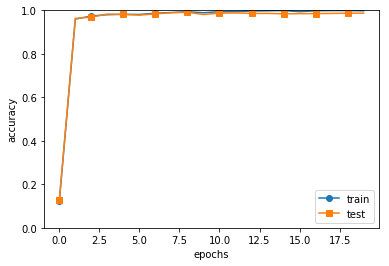

In [36]:
import matplotlib.pyplot as plt
from data.mnist import load_mnist
from data.simple_convnet import SimpleConvNet
from data.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


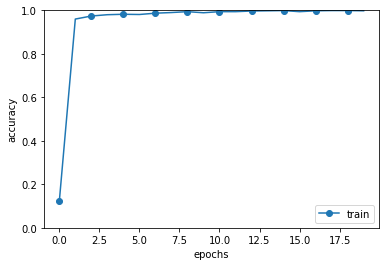

In [42]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()